### Edgar Moises Hernandez-Gonzalez
#### 19/11/19-09/02/20
#### Clasificacion de imagenes motoras en EEG con CNN-1D + LSTM o CNN-1D + GRU
##### Caracteristicas = RAW
##### 5 ejecuciones independientes

#### CNN-1D + LSTM
##### Sujeto 1
##### Accuracy = 46.37%
##### Kappa = 0.2917

#### CNN-1D + GRU
##### Sujeto 1
##### Accuracy = 38.89%
##### Kappa = 0.1852

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import cohen_kappa_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/MI-EEG-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/RAW/EtiquetasA01E.csv", header=None)

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 22000)
(288, 22000)
(288, 1)
(288, 1)


In [4]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [5]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 22, 1000))
x_test = x_test.reshape((n_samples_test, 1, 22, 1000))

print(x_train.shape)
print(x_test.shape)

(288, 1, 22, 1000)
(288, 1, 22, 1000)


In [9]:
x_train = np.transpose(x_train, (0,1,3,2))
x_test = np.transpose(x_test, (0,1,3,2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 1000, 22)
(288, 1, 1000, 22)


In [0]:
def CNN_1D_LSTM():
  model = Sequential()
  model.add(TimeDistributed(Conv1D(32, 3, activation='relu'), input_shape=(None,1000,22)))
  model.add(TimeDistributed(MaxPool1D(2)))
  model.add(TimeDistributed(Conv1D(32, 3, activation='relu')))
  model.add(TimeDistributed(MaxPool1D(2)))
  model.add(TimeDistributed(Conv1D(32, 3, activation='relu')))
  model.add(TimeDistributed(MaxPool1D(2)))
  model.add(TimeDistributed(Flatten()))
  model.add(LSTM(8))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-5)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [0]:
def CNN_1D_GRU():
  model = Sequential()
  model.add(TimeDistributed(Conv1D(32, 3, activation='relu'), input_shape=(None,1000,22)))
  model.add(TimeDistributed(MaxPool1D(2)))
  model.add(TimeDistributed(Conv1D(32, 3, activation='relu')))
  model.add(TimeDistributed(MaxPool1D(2)))
  model.add(TimeDistributed(Conv1D(32, 3, activation='relu')))
  model.add(TimeDistributed(MaxPool1D(2)))
  model.add(TimeDistributed(Flatten()))
  model.add(GRU(8))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(n_classes, activation='softmax'))

  optimizer = Adam(lr=1e-5)
  model.compile(optimizer=optimizer,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

Iteration: 1
288/288 - 0s - loss: 1.4266 - acc: 0.3611
kappa:  0.14814814814814814
f1: 0.35831409027535727
confusion matrix:
 [[27 10 23 12]
 [28 18 12 14]
 [13  7 29 23]
 [11  7 24 30]]


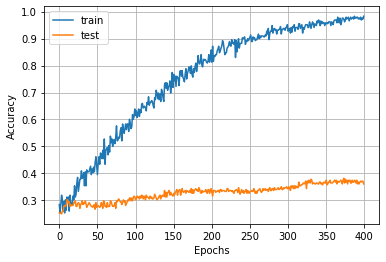

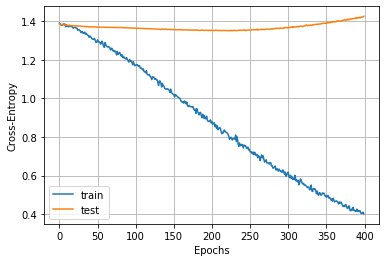

Iteration: 2
288/288 - 0s - loss: 1.4931 - acc: 0.2951
kappa:  0.06018518518518523
f1: 0.29568625772154833
confusion matrix:
 [[21 23 15 13]
 [24 20 15 13]
 [20 14 20 18]
 [16 13 19 24]]


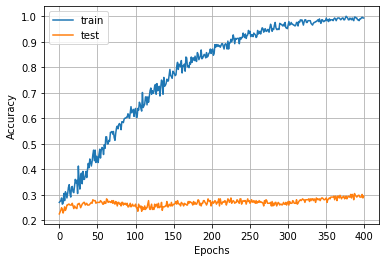

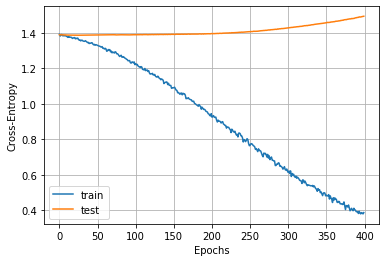

Iteration: 3
288/288 - 0s - loss: 1.4533 - acc: 0.3333
kappa:  0.11111111111111116
f1: 0.31929475692783377
confusion matrix:
 [[34 22  5 11]
 [32 18  7 15]
 [24 12 11 25]
 [17 11 11 33]]


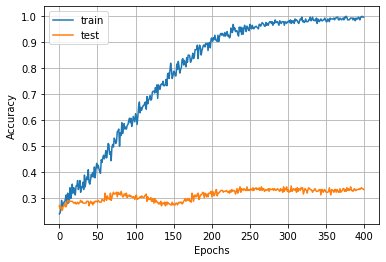

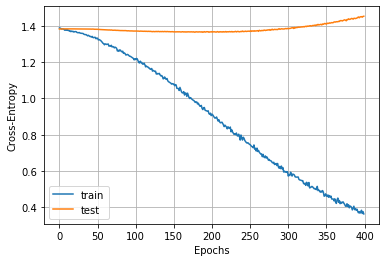

Iteration: 4
288/288 - 0s - loss: 1.3411 - acc: 0.3889
kappa:  0.18518518518518523
f1: 0.384597826985045
confusion matrix:
 [[17 26 21  8]
 [23 35  7  7]
 [13  9 25 25]
 [ 5 10 22 35]]


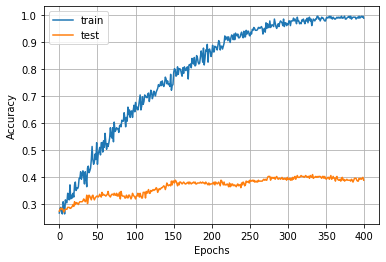

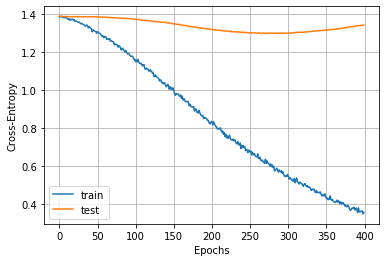

Iteration: 5
288/288 - 0s - loss: 1.5148 - acc: 0.3299
kappa:  0.10648148148148151
f1: 0.32634601011027353
confusion matrix:
 [[26 14 19 13]
 [24 15 22 11]
 [18  9 23 22]
 [14  6 21 31]]


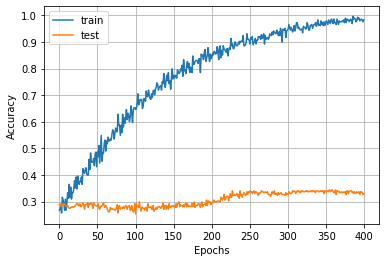

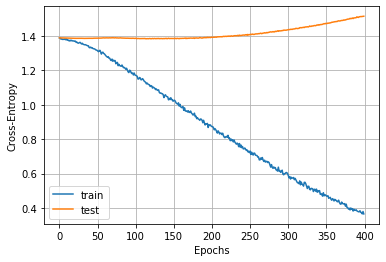


Resultados:
loss: [1.42664635181427, 1.4931409888797336, 1.4533344507217407, 1.3410788377126057, 1.5147825876871746]
accuracy: [0.3611111, 0.2951389, 0.33333334, 0.3888889, 0.3298611]
kappa: [0.14814814814814814, 0.06018518518518523, 0.11111111111111116, 0.18518518518518523, 0.10648148148148151]
f1: [0.35831409027535727, 0.29568625772154833, 0.31929475692783377, 0.384597826985045, 0.32634601011027353]


In [15]:
array_loss = []
array_acc = []
array_kappa = []
array_f1 = []
for i in range(5):
    print("Iteration:", i+1);
    
    model = CNN_1D_GRU()

    history = model.fit(x_train, y_train, epochs=400, batch_size=18,
                        validation_data=(x_test, y_test), verbose=0)
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    array_loss.append(test_loss)
    array_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    
    kappa = cohen_kappa_score(y_test, y_pred)
    array_kappa.append(kappa)
    print("kappa: ", kappa)

    f1 = f1_score(y_test, y_pred, average='macro')
    array_f1.append(f1)
    print("f1:", f1)
    
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_loss)
print("accuracy:", array_acc)
print("kappa:", array_kappa)
print("f1:", array_f1)

In [16]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_63 (TimeDis (None, None, 998, 32)     2144      
_________________________________________________________________
time_distributed_64 (TimeDis (None, None, 499, 32)     0         
_________________________________________________________________
time_distributed_65 (TimeDis (None, None, 497, 32)     3104      
_________________________________________________________________
time_distributed_66 (TimeDis (None, None, 248, 32)     0         
_________________________________________________________________
time_distributed_67 (TimeDis (None, None, 246, 32)     3104      
_________________________________________________________________
time_distributed_68 (TimeDis (None, None, 123, 32)     0         
_________________________________________________________________
time_distributed_69 (TimeDis (None, None, 3936)       

In [17]:
print("Mean Accuracy: %.4f" % np.mean(array_acc))
print("Mean Kappa: %.4f" % np.mean(array_kappa))
print("Mean F1: %.4f" % np.mean(array_f1))
print("Max Accuracy: %.4f" % np.max(array_acc))
print("Max Kappa: %.4f" % np.max(array_kappa))
print("Max F1: %.4f" % np.max(array_f1))

Mean Accuracy: 0.3417
Mean Kappa: 0.1222
Mean F1: 0.3368
Max Accuracy: 0.3889
Max Kappa: 0.1852
Max F1: 0.3846
